<a href="https://colab.research.google.com/github/jellyho/AI_Learning_jellyho/blob/main/3_Logistic_Regression%26SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

패키지 임포트

In [15]:
import numpy as np
from sklearn import datasets
from matplotlib import pyplot as plt

데이터 불러오기

In [5]:
iris = datasets.load_iris()
X = iris.data[:, [2,3]]
y = iris.target
print('label', np.unique(y))

label [0 1 2]


데이터 셋 분리

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

로지스틱 회귀 클래스

In [12]:
class LRGD(object):
  def __init__(self, eta=0.05, n_iter=100, random_state=1):
    self.eta = eta
    self.n_iter = n_iter
    self.random_state = random_state

  def fit(self, X, y):
    rgen = np.random.RandomState(self.random_state)
    self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
    self.cost_ = []

    for i in range(self.n_iter):
      net_input = self.net_input(X)
      output = self.activation(net_input)
      errors = y - output
      self.w_[1:] += self.eta * X.T.dot(errors)
      self.w_[0] += self.eta * errors.sum()

      cost = (-y.dot(np.log(output)) - ((1 - y).dot(np.log(1 - output))))
      self.cost_.append(cost)

    return self

  def net_input(self, X):
    return np.dot(X, self.w_[1:]) + self.w_[0]

  def activation(self, z):
    return 1. / (1. + np.exp(-np.clip(z, -250, 250)))

  def predict(self, X):
    return np.where(self.net_input(X) >= 0.0, 1, 0)

결정경계 함수

In [17]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
  markers = ('s', 'x', 'o', '^', 'v')
  colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
  cmap = ListedColormap(colors[:len(np.unique(y))])

  x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1

  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),np.arange(x2_min, x2_max, resolution))
  Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  Z = Z.reshape(xx1.shape)
  plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())

  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=colors[idx], marker=markers[idx], label=cl, edgecolor='black')
  
  if test_idx:
    X_test, y_test = X[test_idx, :], y[test_idx]
    plt.scatter(X_test[:, 0], X_test[:, 1],c='', edgecolor='black', alpha=1.0, linewidth=1, marker='o',s=100,label='test set')

인덱스 0,1 만사용하여 로지스틱 회귀 실행

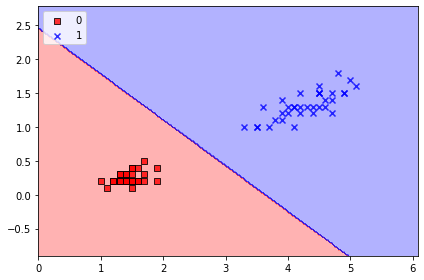

In [18]:
X_train_subset = X_train[(y_train == 0 | (y_train == 1))]
y_train_subset = y_train[(y_train == 0 | (y_train == 1))]
lrgd = LRGD(eta=0.05, n_iter=1000, random_state=1)
lrgd.fit(X_train_subset, y_train_subset)
plot_decision_regions(X=X_train_subset, y=y_train_subset, classifier=lrgd)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

사이킷런으로 로지스틱 회귀!

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


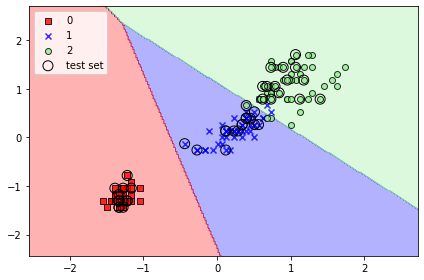

In [26]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear', multi_class='auto',C=100.0, random_state=78)

from sklearn.preprocessing import StandardScaler as SC
sc = SC()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

lr.fit(X_train_std, y_train)

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X_combined_std, y_combined, classifier=lr, test_idx=range(105,150))
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

확률 가져오기

In [22]:
lr.predict_proba(X_test_std[33:34, :])

array([[0.00261983, 0.9954163 , 0.00196387]])

서포트 벡터 머신!

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


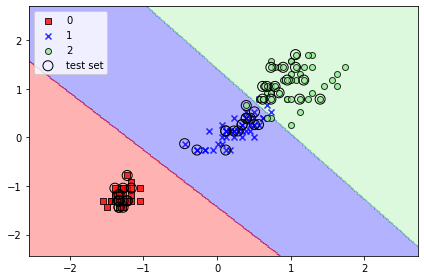

In [30]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=100, random_state=1)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105,150))
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()